In [ ]:
from google.colab import drive
drive.mount('/drive')

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [ ]:
import warnings
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import RobustScaler
import numpy as np
from lightgbm import LGBMClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, \
    classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Data Exploration

In [ ]:
#reading the data set
df = pd.read_csv("/drive/MyDrive/DataLTPython/diabetes.csv")

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
print("Diabetes data set dimensions : {}".format(df.shape))

Diabetes data set dimensions : (768, 9)


In [ ]:
df.groupby('Outcome').size()

Outcome
0    500
1    268
dtype: int64

0    500
1    268
Name: Outcome, dtype: int64


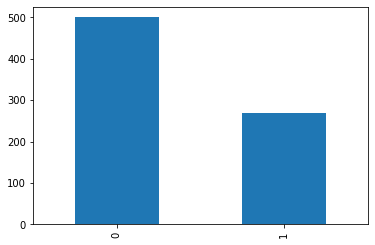

In [ ]:
color_wheel = {1: "#0392cf", 
               2: "#7bc043"}
colors = df["Outcome"].map(lambda x: color_wheel.get(x + 1))
print(df.Outcome.value_counts())
p=df.Outcome.value_counts().plot(kind="bar")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe990176ed0>,
      dtype=object)

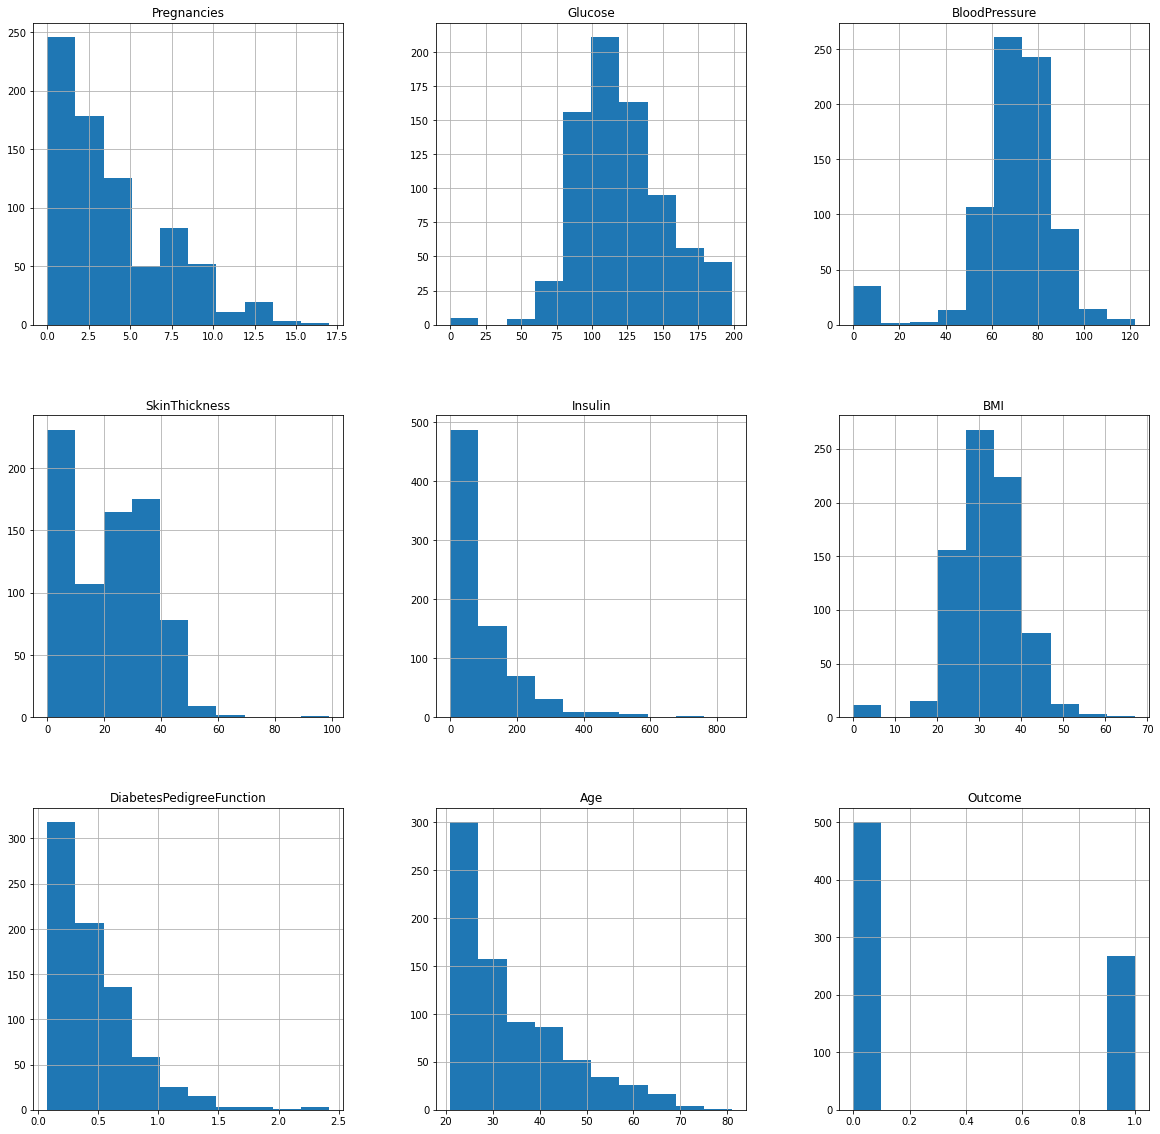

In [ ]:
# see how the data is distributed.
df.hist(figsize = (20,20))

In [ ]:
print("Total BloodPtrssure : ", df[df.BloodPressure == 0].shape[0])
print("Total Glucose : ", df[df.Glucose == 0].shape[0])
print("Total SkinThickness : ", df[df.SkinThickness == 0].shape[0])
print("Total BMI : ", df[df.BMI == 0].shape[0])
print("Total Insulin : ", df[df.Insulin == 0].shape[0])

Total BloodPtrssure :  35
Total Glucose :  5
Total SkinThickness :  227
Total BMI :  11
Total Insulin :  374


In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Data processing

In [ ]:
df_mod = df[(df.BloodPressure != 0) & (df.BMI != 0) & (df.Glucose != 0)]
print(df_mod.shape)

(724, 9)


In [ ]:
X = df.iloc[:, :-2]
y = df.iloc[:, -1]

# Model Normal

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.2)

# Creating the SVM model.
clf = SVC()
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.92      0.82      0.86       120
           1       0.53      0.74      0.62        34

    accuracy                           0.80       154
   macro avg       0.72      0.78      0.74       154
weighted avg       0.83      0.80      0.81       154



# Kfold 

In [ ]:
kfold = KFold(n_splits=5, shuffle=True, random_state=1)
accuracy_list = []
X_data = X
y_data = y
for train, test in kfold.split(X_data, y_data):
    clf = SVC()
    X_train, X_test = X_data.iloc[train], X_data.iloc[test];
    y_train, y_test = y_data.iloc[train], y_data.iloc[test]

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy_list.append(accuracy_score(y_test, y_pred))

print("Accuracy: ", np.mean(accuracy_list) * 100)

Accuracy:  75.78134284016637


In [ ]:
models = [('LR', LogisticRegression()),
          ('KNN', KNeighborsClassifier()),
          ('CART', DecisionTreeClassifier()),
          ('RF', RandomForestClassifier()),
          ('XGBM', XGBClassifier()),
          ('GB',GradientBoostingClassifier()),
          ("LightGBM", LGBMClassifier())]

# evaluate each model in turn
results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=5)
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring="accuracy")
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LR: 0.766989 (0.031051)
KNN: 0.700569 (0.048939)
CART: 0.682361 (0.054699)
RF: 0.750013 (0.036796)
XGBM: 0.752653 (0.039242)
GB: 0.747432 (0.022651)
LightGBM: 0.725295 (0.028636)


# Tunning paramater in SVM

## Tunning with kernel

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.2)

kernel = ['linear','poly','rbf','sigmoid']
for i in kernel:
  model = SVC(kernel=i,C=1.0)
  model.fit(x_train,y_train)
  print('Kernel',i,'accuracy is:',model.score(x_test,y_test))

Kernel linear accuracy is: 0.8051948051948052
Kernel poly accuracy is: 0.7987012987012987
Kernel rbf accuracy is: 0.7987012987012987
Kernel sigmoid accuracy is: 0.5194805194805194


## Tunning with degree domain value [1,10]

In [ ]:
for i in range(1,10):
  model = SVC(kernel='poly',degree=i)
  model.fit(x_train,y_train)
  print('Degree',i,'accuracy is:',model.score(x_test,y_test))

Degree 1 accuracy is: 0.8051948051948052
Degree 2 accuracy is: 0.7987012987012987
Degree 3 accuracy is: 0.7987012987012987
Degree 4 accuracy is: 0.7727272727272727
Degree 5 accuracy is: 0.7857142857142857
Degree 6 accuracy is: 0.7792207792207793
Degree 7 accuracy is: 0.7792207792207793
Degree 8 accuracy is: 0.7857142857142857
Degree 9 accuracy is: 0.7727272727272727


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.2)
param_grid = {
    #'C':[0.1,1,100,1000],
    'kernel':['linear','poly','rbf','sigmoid'],
    #'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
}
grid = GridSearchCV(SVC(),param_grid)
grid.fit(x_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [ ]:
print(grid.best_params_)
print(grid.score(x_test,y_test))

{'C': 1, 'degree': 1, 'kernel': 'linear'}
0.8051948051948052
